In [1]:
!pip install selenium

In [2]:
!pip list

Package              Version
-------------------- ---------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
async-generator      1.10
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.10.0
bleach               4.1.0
bs4                  0.0.1
certifi              2021.10.8
cffi                 1.15.0
colorama             0.4.4
cryptography         36.0.2
cycler               0.11.0
debugpy              1.6.0
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.3
fonttools            4.31.2
h11                  0.13.0
idna                 3.3
importlib-resources  5.6.0
ipykernel            6.10.0
ipython              8.2.0
ipython-genutils     0.2.0
ipywidgets           7.7.0
jedi                 0.18.1
Jinja2               3.1.1
jsonschema           4.4.0
jupyter              1.0.0
jupyter-client       7.1.2
jupyter-console      6.4.3
jupyter-core         4.9.2
jupyterlab-p

### 모듈 정보 확인하기

In [3]:
!pip show selenium

Name: selenium
Version: 4.1.3
Summary: 
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\pc00\appdata\local\programs\python\python38\lib\site-packages
Requires: trio, trio-websocket, urllib3
Required-by: 


셀레니움은 파이썬에서 웹 브라우저를 제어할 수 있도록 도와주는 모듈

# 웹 브라우저 제어용 웹 드라이버

1. 크롬 웹 드라이버
https://chromedriver.storage.googleapis.com/index.html?


2. 엣지 웹 드라이버
https://docs.microsoft.com/ko-kr/microsoft-edge/webdriver
https://developer.microsoft.com/ko-kr/microsoft-edge/tools/webdriver/



3. 파이어폭스 웹 드라이버
https://github.com/mozilla/geckodriver/releases


4. 사파리 웹 드라이버
https://developer.apple.com/documentation/webkit/testing_with_webdriver_in_safari

크롬 버전과 웹 드라이버 버전이 일치해야 한다.

- 크롬 창에서 '설정>도움말>chrome 정보'

In [4]:
%pwd

'D:\\이지은\\10_Python\\guide'

In [5]:
!dir chromedriver.exe

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: D0A5-96AF

 D:\이지은\10_Python\guide 디렉터리

2022-02-26  오후 07:11        11,885,568 chromedriver.exe
               1개 파일          11,885,568 바이트
               0개 디렉터리  794,824,839,168 바이트 남음


### 실습: 서울 지역의 최저가 주유소 찾기
### 홈페이지 주소: https://www.opinet.co.kr

https://www.opinet.co.kr/user/main/mainView.do


- 크롤링 관련 모듈 함수 호출

파이썬에서 기본 제공하지 않으므로 파일을 파이썬 안으로 가져온다.

In [6]:
# 이미지 캡처, 이미지 불러오기
!pip install pillow

In [4]:
from selenium import webdriver
from PIL import Image
import time
import warnings
warnings.filterwarnings(action='ignore')

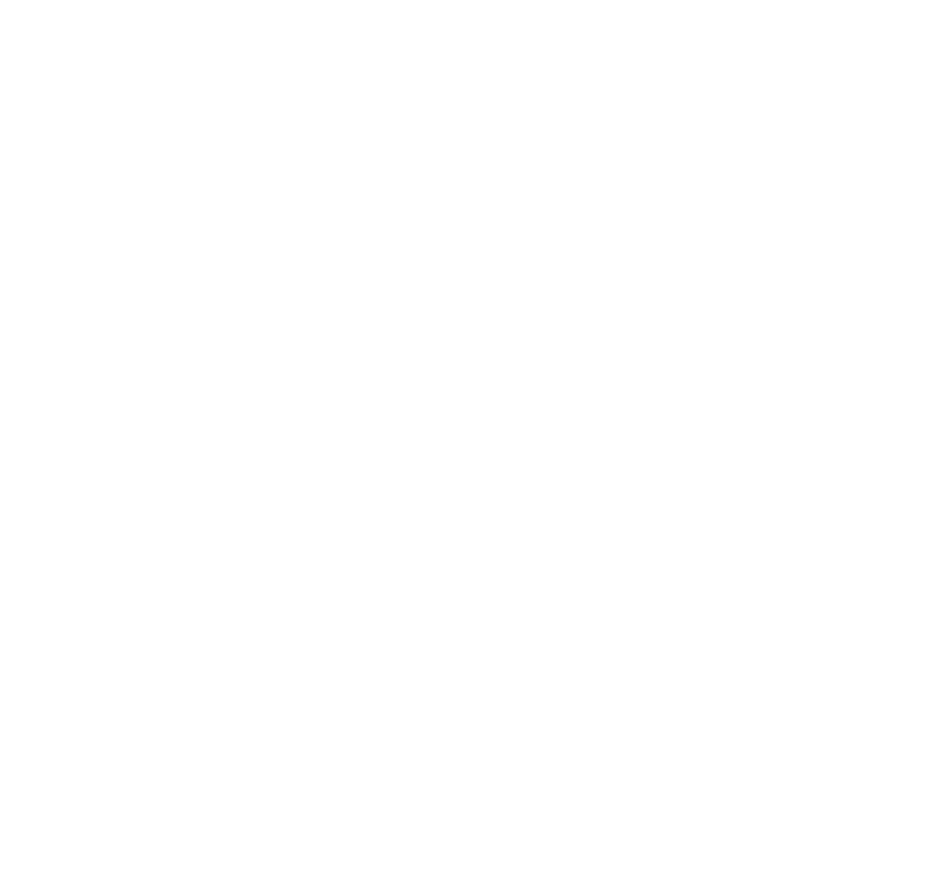

In [13]:
# 웹 브라우저를 제어할 웹 드라이버를 지정
# mac은 확장자 불필요
driver=webdriver.Chrome('chromedriver.exe')

# 접속할 페이지 지정
driver.get('https://www.opinet.co.kr/user/main/mainView.do')

# 페이지가 로딩될 때까지 기다리는 시간을 초 단위로 지정
# time.sleep(3)

driver.save_screenshot('오피넷1.png')
Image.open('오피넷1.png')

# 주의: 자동으로 열린 크롬창은 절대 건드리지 않는다.

### 1. 현재 페이지에서 수동으로 '싼 주유소 찾기>지역별'

XPath 값은 따옴표를 전후로 3개 붙인다.

'''//*[@id="SIGUNGU_NM0"]'''

In [15]:
from selenium.webdriver.common.action_chains import ActionChains

In [16]:
xpath1='''//*[@id="header"]/div/ul/li[1]/a'''
hover=driver.find_element_by_xpath(xpath1)
xpath2='''//*[@id="header"]/div/ul/li[1]/ul/li[1]/a'''
menu=driver.find_element_by_xpath(xpath2)

ActionChains(driver).move_to_element(hover).click(menu).perform()

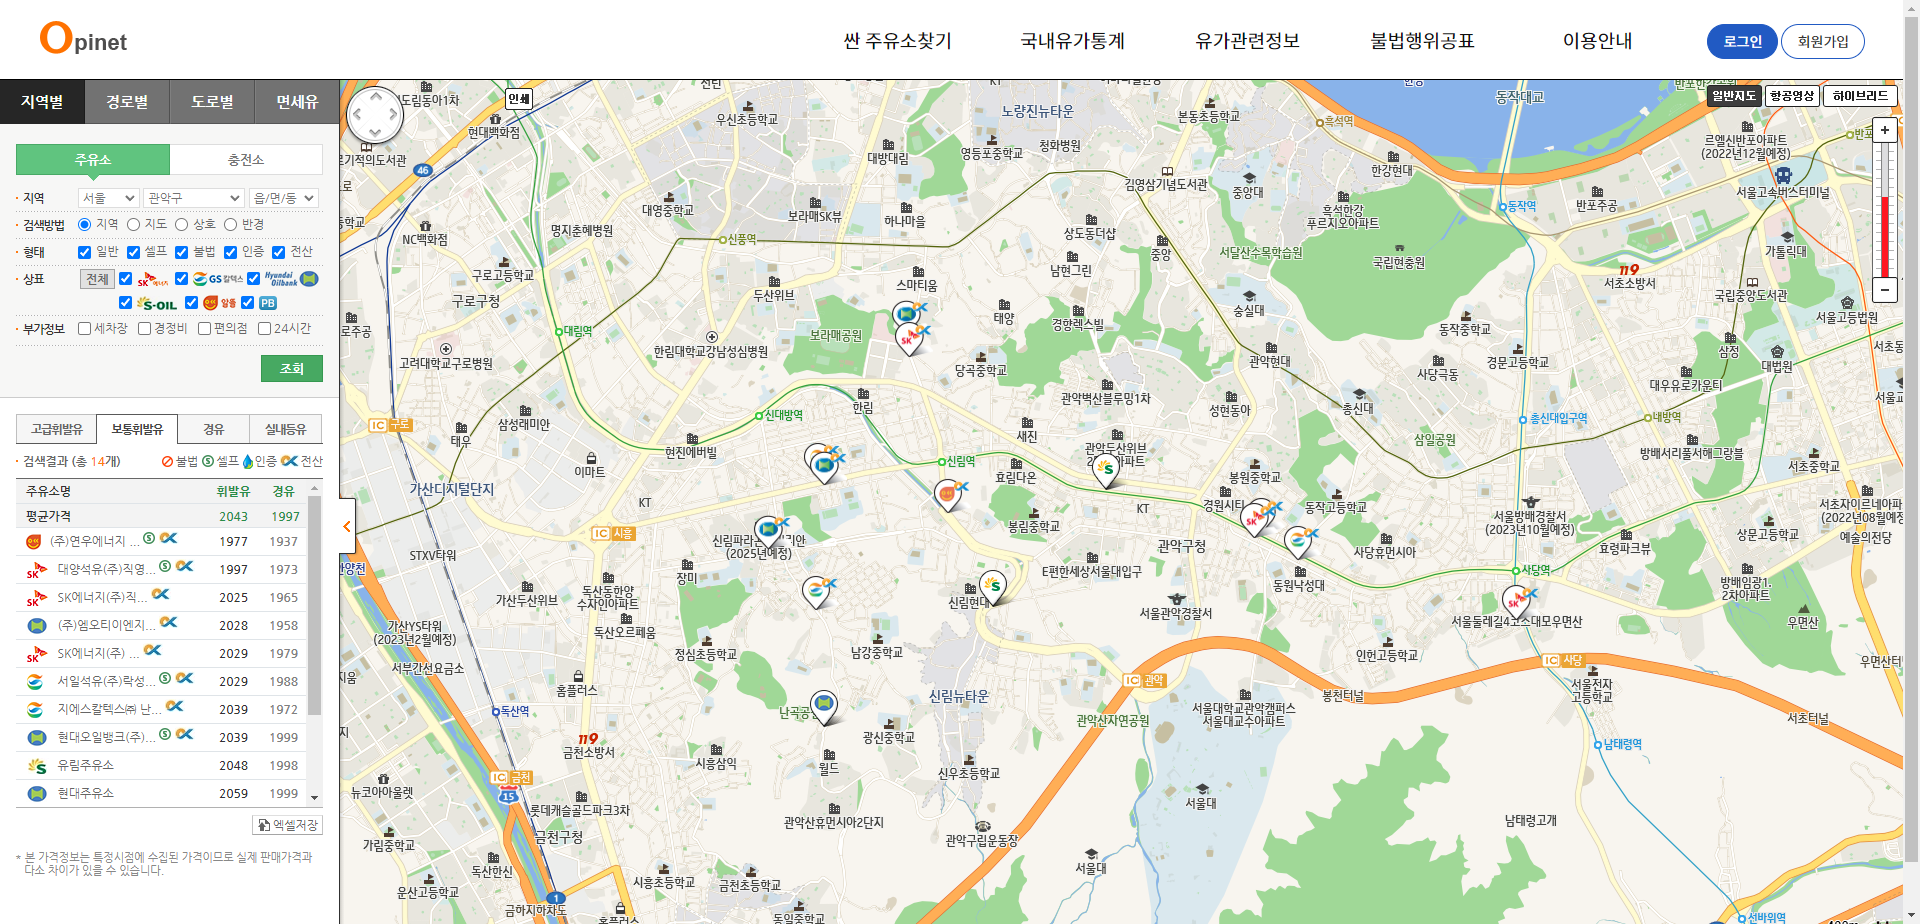

In [17]:
xpath='''//*[@id="SIGUNGU_NM0"]'''
gu_list_raw=driver.find_element_by_xpath(xpath)

driver.save_screenshot('오피넷2.png')
Image.open('오피넷2.png')

In [19]:
gu_list=gu_list_raw.find_elements_by_tag_name('option')

print(gu_list)

[<selenium.webdriver.remote.webelement.WebElement (session="c923160b21b9db32c6670936bb3ece62", element="7abb18b5-368b-4a6b-83fc-b77070bc7718")>, <selenium.webdriver.remote.webelement.WebElement (session="c923160b21b9db32c6670936bb3ece62", element="9966c9c9-a809-4ace-8e54-7867f6b8d430")>, <selenium.webdriver.remote.webelement.WebElement (session="c923160b21b9db32c6670936bb3ece62", element="827412c8-f865-45a9-946c-bdedea74aa83")>, <selenium.webdriver.remote.webelement.WebElement (session="c923160b21b9db32c6670936bb3ece62", element="b95ad772-2fa9-45c9-b586-0f693826c333")>, <selenium.webdriver.remote.webelement.WebElement (session="c923160b21b9db32c6670936bb3ece62", element="ecadb8fc-ae05-4330-bc06-4f8521283344")>, <selenium.webdriver.remote.webelement.WebElement (session="c923160b21b9db32c6670936bb3ece62", element="e4e7a401-327e-44fb-9562-bdc648888185")>, <selenium.webdriver.remote.webelement.WebElement (session="c923160b21b9db32c6670936bb3ece62", element="030a8b2c-e660-4c0f-8960-551a30c5

In [20]:
for option in gu_list :
    print(option.get_attribute('value'))


강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


### 리스트 컴프리헨션(List Comprehension)

- 반복문이나 조건문을 한 줄로 작성한다.
- 실행문은 맨 처음 위치에 작성한다.
- print() 함수를 생략한다.

In [21]:
gu_names=[option.get_attribute('value') for option in gu_list]
gu_names.remove('')
print(gu_names, end=' ')

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'] 

### 행정구역 이름 조회 테스트

객체: 고유의 성질을 나타낼 수 있는 값

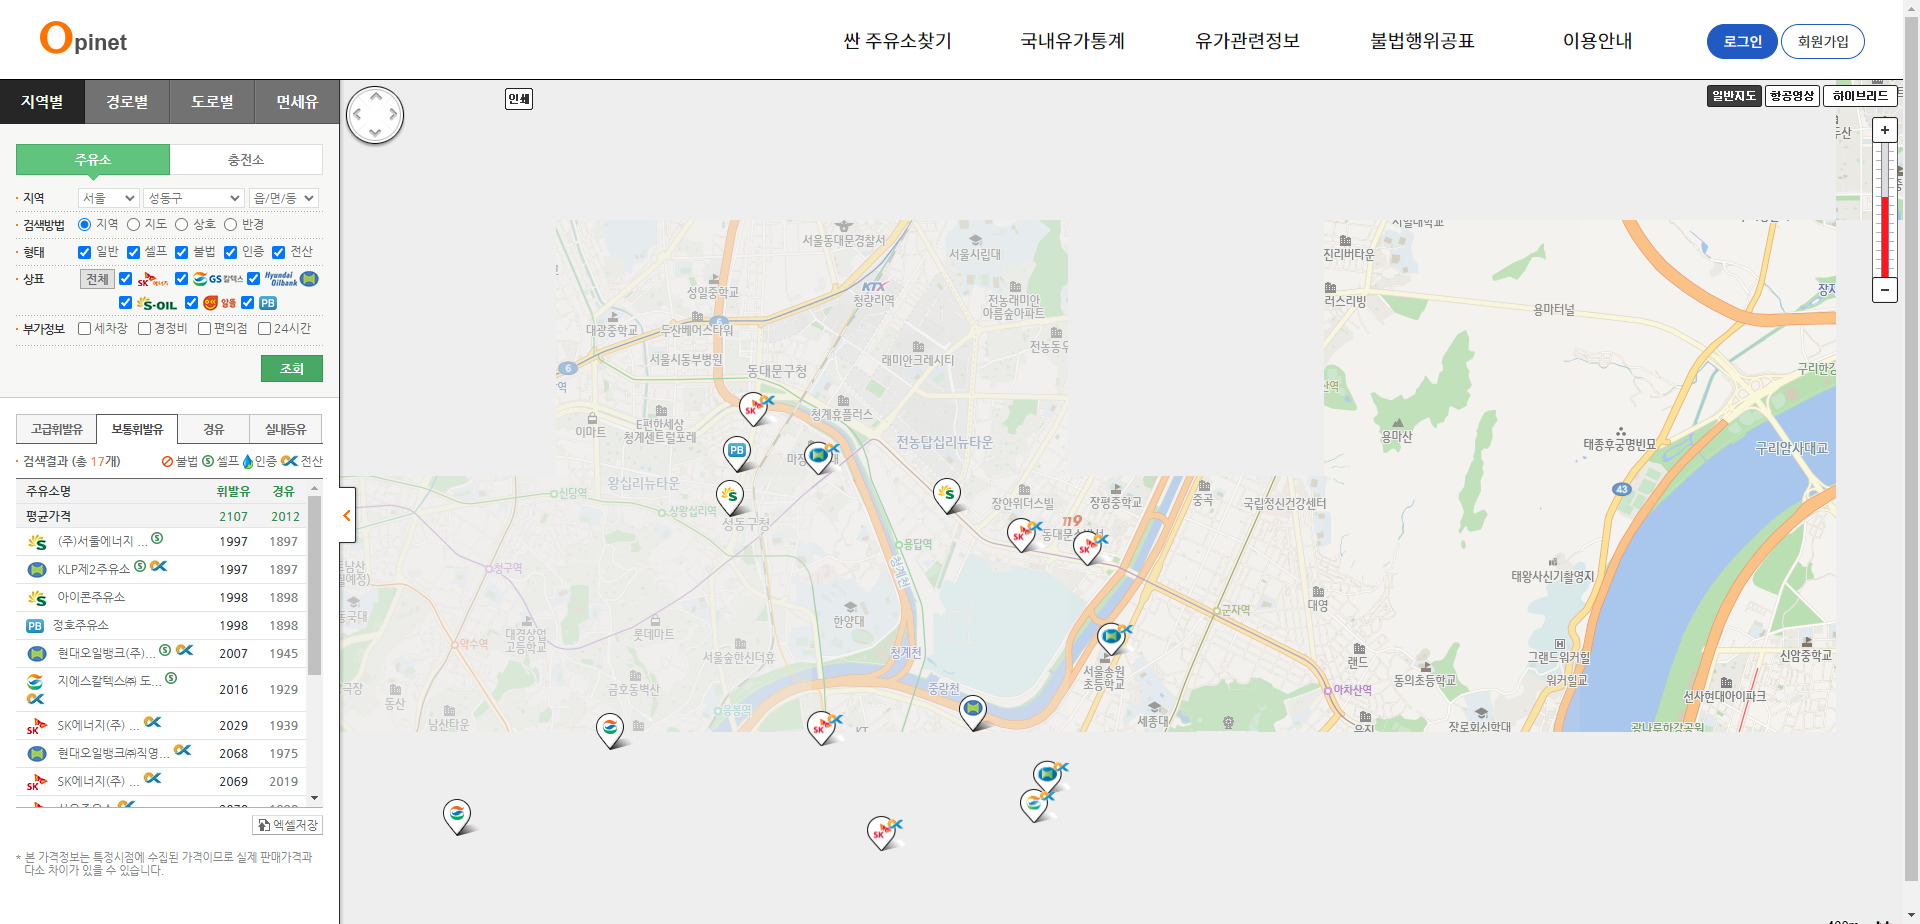

In [22]:
element=driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[15])

driver.save_screenshot('오피넷3.png')
Image.open('오피넷3.png')

#### 조회 버튼, 엑셀 저장 버튼 자바스크립트 - XPath

- 조회 버튼: '''//*[@id="searRgSelect"]'''
- 엑셀 저장 버튼: '''//*[@id="glopopd_excel"]'''

In [23]:
# 조회 버튼 클릭

xpath='''//*[@id="searRgSelect"]'''

element_sel_gu=driver.find_element_by_xpath(xpath).click()

In [22]:
# 엑셀 저장 버튼 클릭

xpath='''//*[@id="glopopd_excel"]'''

element_get_excel=driver.find_element_by_xpath(xpath).click()

### 진행 상황을 알려주는 tqdm 모듈

- 반복중인 진행 상황을 막대 그래프로 표시해준다. (%로 출력)

In [23]:
!pip install tqdm

     ---------------------------------------- 76.6/76.6 KB 2.1 MB/s eta 0:00:00


In [24]:
import time
from tqdm.notebook import tqdm

for gu in tqdm(gu_names) :
    element=driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)
    
    # 조회 버튼 클릭
    xpath='''//*[@id="searRgSelect"]'''
    element_sel_gu=driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    
    # 엑셀 저장 버튼 클릭
    xpath='''//*[@id="glopopd_excel"]'''
    element_get_excel=driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    
driver.close()

  0%|          | 0/25 [00:00<?, ?it/s]

## 네이버 자동 로그인하기

In [25]:
from selenium import webdriver
from PIL import Image
import time
import warnings
warnings.filterwarnings(action='ignore')

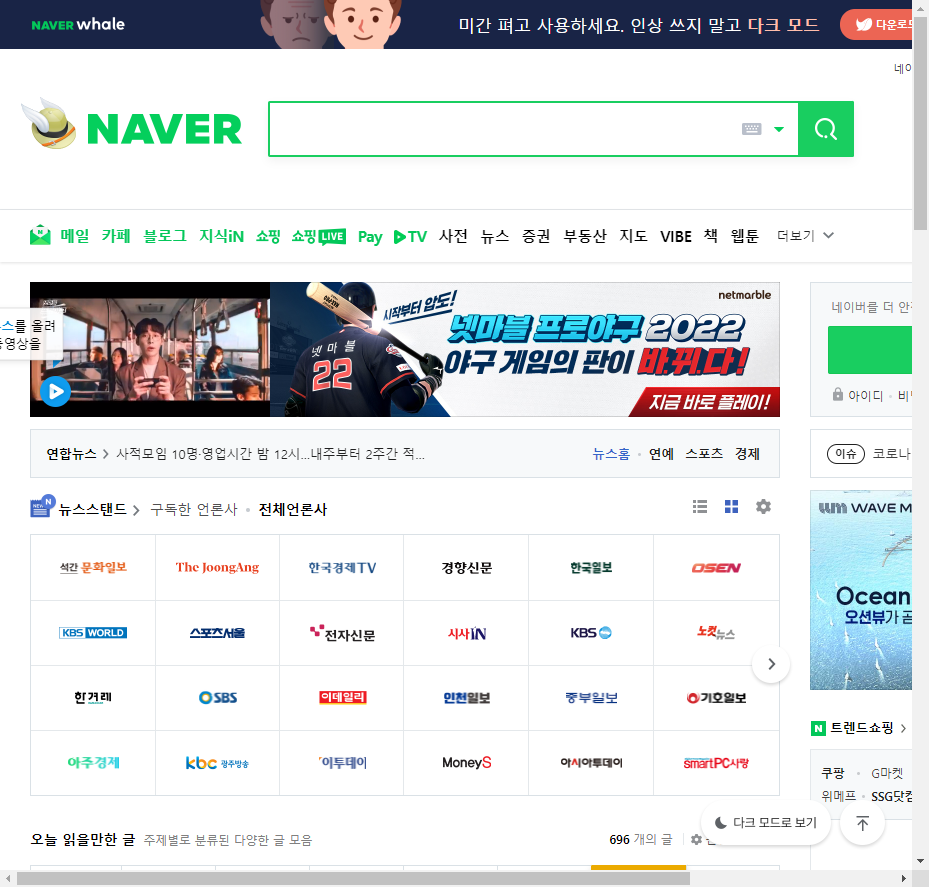

In [26]:
driver=webdriver.Chrome('chromedriver.exe')

driver.get('https://www.naver.com/')

time.sleep(1)

driver.save_screenshot('네이버1.png')
Image.open('네이버1.png')

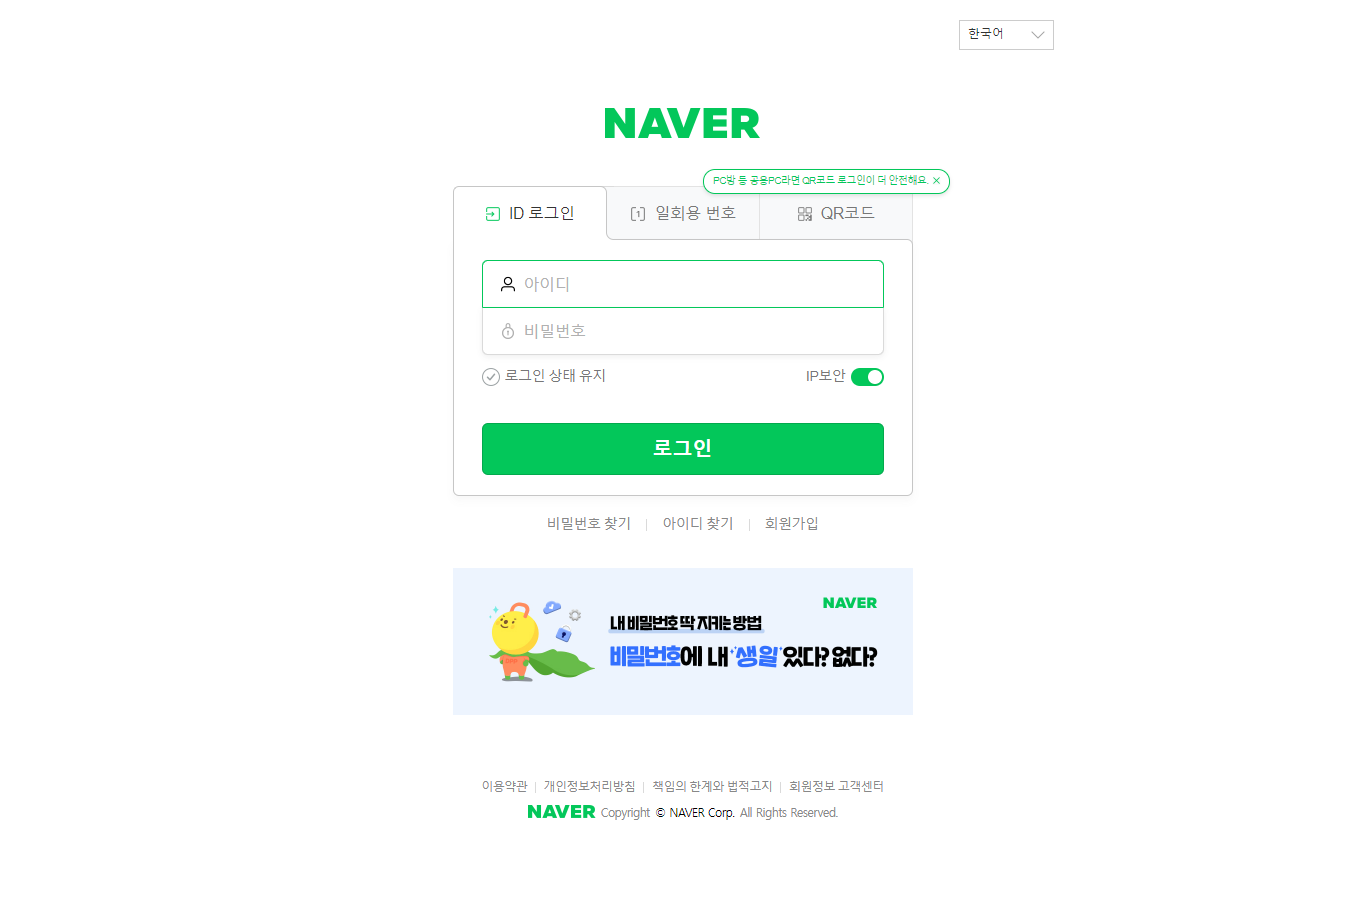

In [27]:
xpath='''//*[@id="account"]/a'''
driver.find_element_by_xpath(xpath).click()
time.sleep(1)

driver.save_screenshot('네이버2.png')
Image.open('네이버2.png')

In [29]:
element_id=driver.find_element_by_id('id')
element_id.clear()
element_id.send_keys('아이디')

In [30]:
element_pw=driver.find_element_by_id('pw')
element_pw.clear()
element_pw.send_keys('비밀번호')

In [31]:
xpath='''//*[@id="log.login"]'''
driver.find_element_by_xpath(xpath).click()